# Stability and Stiffness

In the past when you've talked about **stability**, it has likely been regarding the stability of a *system*. Stable systems are those will well-behaved exact solutions, meaning they do not grow unbounded.
In engineering we mostly focus (or want!) stable systems, although there are some interesting unstable systems such as those involving resonance, nonlinear dynamics, or chaos—generally we want to know when that happens so we can prevent it.

We can also define the stability of a *numerical scheme*, which is when the numerical solution exhibits unphysical behavior. In other words, it blows up.

For example, let's consider the relatively simple 1st-order ODE
\begin{equation}
\frac{dy}{dt} = -3 y
\end{equation}
with the initial condition $y(0) = 1$. As we will see, this ODE can cause explicit numerical schemes to become unstable, and thus it is a **stiff** ODE. (Note that we can easily obtain the exact solution for this problem, which is $y(t) = e^{-3 t}$.)

Let's try solving this with the Forward Euler method, integrating over $0 \leq t \leq 10$, for a range of time-step size values: $\Delta t = 0.1, 0.25, 0.5, 0.75$:

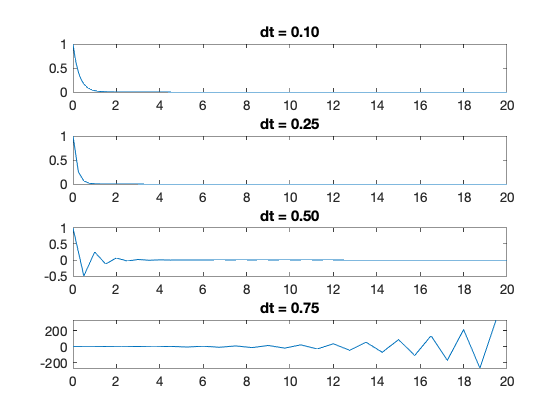

In [7]:
clear
f = @(t,y) -3*y;

dt = 0.1;
t = 0 : dt : 20;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,1);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.25;
t = 0 : dt : 20;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,2);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.5;
t = 0 : dt : 20;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,3);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.75;
t = 0 : dt : 20;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,4);
plot(t, y); title(sprintf('dt = %4.2f', dt));

At the smaller step sizes, $\Delta t = 0.1$ and $\Delta t = 0.25$, we see that the solution is well-behaved. But, when we increase $\Delta t$ to 0.5, we see some instability that goes away with time. Then, when we increase $\Delta t$ to 0.75, the solution eventually blows up, leading to error **much** larger than what we should expect based on the method's order of accuracy (first) and the step size value.

Compare this behavior to that for the ODE
\begin{equation}
\frac{dy}{dt} = e^{-t}
\end{equation}
which is **non-stiff**:

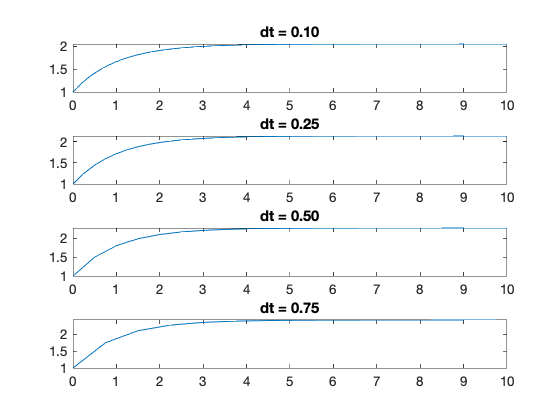

In [4]:
clear
f = @(t,y) exp(-t);

dt = 0.1;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,1);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.25;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,2);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.5;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,3);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.75;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,4);
plot(t, y); title(sprintf('dt = %4.2f', dt));

In this case, we see that the solution remains well-behaved even for larger time-step sizes, and the error matches the expected order based on the method and step-size value.

In general numerical schemes can be:

- **unstable**: the scheme blows up for any choice of parameters
- **conditionally stable**: the scheme is stable for a particular choice of parameters (for example, $\Delta t$ is less than some threshold
- **unconditionally stable**: the scheme is always stable

Schemes may be stable for some problem/system and not for another, and vice versa.

Stability is related to robustness of a method, which is generally a tradeoff between complexity and computational cost. The choice of method and solution strategy depends on what you want, and how long you can wait for it. In general, we almost always want to use the largest $\Delta t$ allowable.

Rather than reducing $\Delta t$ to avoid stability problems, we can also use a method that is unconditionally stable, such as the **Backward Euler** method.

## Backward Euler method

The Backward Euler method is very similar to the Forward Euler method, except in one way: it uses the slope at the *next* time step: 
\begin{equation}
    \left(\frac{dy}{dx}\right)_{i+1} \approx \frac{y_{i+1} - y_i}{\Delta x}
\end{equation}
Then, the resulting recursion formula is
\begin{equation}
y_{i+1} = y_i + \Delta x \left(\frac{dy}{dx}\right)_{i+1}, \text{ or} \\
y_{i+1} = y_i + \Delta x \, f(x_{i+1}, y_{i+1})
\end{equation}
where $f(x,y) = dy/dx$.

Notice that this recursion formula cannot be directly solved, because $y_{i+1}$ shows up on both sides. This is an **implicit** method, where all the other methods we have covered (Forward Euler, Heun's, Midpoint, and 4th-order Runge-Kutta) are **explicit**. Implicit methods require more work to actually implement.

### Backward Euler example
For example, consider the problem 
\begin{equation} 
\frac{dy}{dx} = f(x,y) = 8 e^{-x} (1+x) - 2y
\end{equation}
To actually solve this problem with the Backward Euler method, we need to incorporate the derivative function $f(x,y)$ into the recursion formula and solve for $y_{i+1}$:
\begin{align}
y_{i+1} &= y_i + \Delta x \, f(x_{i+1}, y_{i+1}) \\
y_{i+1} &= y_i + \Delta x \left[ 8 e^{-x_{i+1}} (1 + x_{i+1}) - 2 y_{i+1} \right] \\
y_{i+1} &= y_i + 8 e^{-x_{i+1}} (1 + x_{i+1}) \Delta x - 2 \Delta x \, y_{i+1} \\
y_{i+1} + 2 \Delta x \, y_{i+1} &= y_i + 8 e^{-x_{i+1}} (1 + x_{i+1}) \Delta x \\
y_{i+1} &= \frac{ y_i + 8 e^{-x_{i+1}} (1 + x_{i+1}) \Delta x }{ 1 + 2 \Delta x }
\end{align}
Now we have a useable recursion formula that we can use to solve this problem. Let's use the initial condition $y(0) = 1$, the domain $0 \leq x \leq 7$, and $\Delta x = 0.2$.

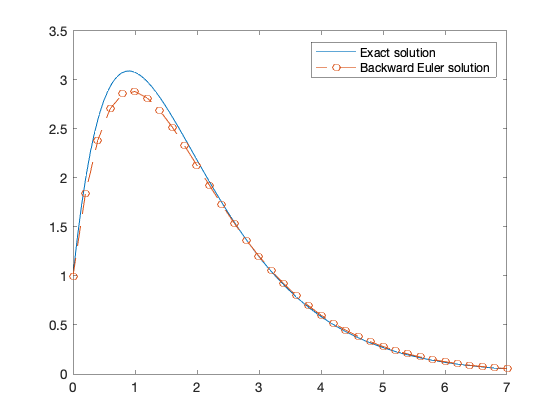

In [5]:
clear

dx = 0.2;
x = 0 : dx : 7;
y = zeros(length(x), 1);
y(1) = 1;

% Backward Euler loop
for i = 1 : length(x) - 1
    y(i+1) = (y(i) + 8*exp(-x(i+1))*(1 + x(i+1))*dx) / (1 + 2*dx);
end

x_exact = linspace(0, 7);
y_exact = exp(-2.*x_exact).*(8*x_exact.*exp(x_exact) + 1);
plot(x_exact, y_exact); hold on
plot(x, y, 'o--')
legend('Exact solution', 'Backward Euler solution')

This matches nearly what we saw with the Forward Euler method before—Backward Euler is also a **first-order** method, so the global error should be proportional to $\Delta x$.

Let's now return to the stiff ODE $y^{\prime} = -3 y$, and see how the Backward Euler method does. First, we need to obtain our useable recursion formula:
\begin{align}
y_{i+1} &= y_i + \Delta t \, f(t_{i+1}, y_{i+1}) \\
y_{i+1} &= y_i + \Delta t \, \left( -3 y_{i+1} \right) \\
y_{i+1} + 3 y_{i+1} \Delta t &= y_i \\
y_{i+1} &= \frac{y_i}{1 + 3 \Delta t}
\end{align}

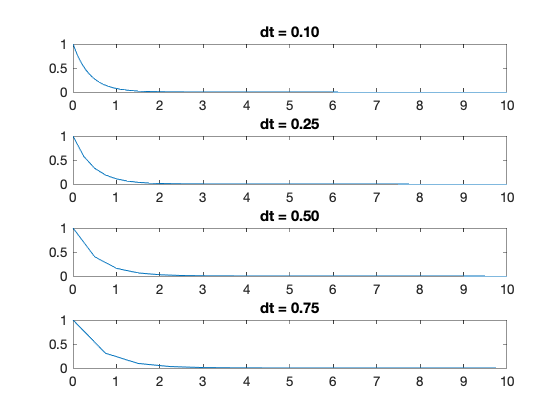

In [6]:
clear

dt = 0.1;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) / (1 + 3*dt);
end
subplot(4,1,1);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.25;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) / (1 + 3*dt);
end
subplot(4,1,2);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.5;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) / (1 + 3*dt);
end
subplot(4,1,3);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.75;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) / (1 + 3*dt);
end
subplot(4,1,4);
plot(t, y); title(sprintf('dt = %4.2f', dt));

In this case, we see that the solution remains well-behaved for all the step sizes, not showing any of the instability we saw with the Forward Euler method. This is because the Backward Euler method is **unconditionally stable**.

## Stability analysis

### Stability analysis of Forward Euler

We can perform a stability analysis of the stiff problem to identify when the Forward Euler method becomes unstable. Let's apply the method to the ODE at hand:
\begin{align}
\frac{dy}{dt} &= -3 y \\
y_{i+1} &= y_i + \Delta t f(t_i, y_i) \\
y_{i+1} &= y_i + \Delta t (-3 y_i) \\
 &= y_i (1 - 3 \Delta t) \\
\frac{y_{i+1}}{y_i} &= \sigma = 1 - 3 \Delta t 
\end{align}
where $\sigma$ is the **amplification factor**. This defines whether the solution grows or decays each step—for a stable physical system, we expect the solution to get smaller or remain contant with each step.

Therefore, for the method to remain stable, we must have $\sigma | \leq 1$. We can use this stability criterion to find conditions on $\Delta t$ for stability:
\begin{gather}
| \sigma | = | 1 - 3 \Delta t | \leq 1 \\
-1 \leq 1 - 3 \Delta t \leq 1 \\
-1 \leq 1 - 3 \Delta t \quad \text{or} \quad 1 - 3 \Delta t \leq 1 \\
\frac{-2}{3} \leq -\Delta t \quad \quad -\Delta t \leq 0 \\
\rightarrow \Delta t \leq \frac{2}{3} \quad \text{and} \quad \Delta t \geq 0 \\
\therefore 0 \leq \Delta t \leq \frac{2}{3}
\end{gather}
for stability. (For safety, we might use $\Delta t < 1/2$ for safety, to stay away from the absolute stability limit.)

The Forward Euler method is then *conditionally stable*. 

As a general rule of thumb, all **explicit** methods are conditionally stable; these are methods where the recursion formula for $y_{i+1}$ can be written and calculated explicitly in terms of known quantities.

### Stability analysis of Backward Euler

We can also perform a stability analysis on the Backward Euler method to show that its stability does not depend on the step size:
\begin{align}
\frac{dy}{dt} &= -3 y \\
y_{i+1} &= y_i + \Delta t f(t_{i+1}, y_{i+1}) \\
y_{i+1} &= y_i + \Delta t (-3 y_{i+1}) \\
y_{i+1} (1 + 3 \Delta t) &= y_i \\
\sigma &= \frac{y_{i+1}}{y_i} = \frac{1}{1 + 3 \Delta t}
\end{align}
For stability, we need $| \sigma | \leq 1$:
\begin{align}
| \sigma | &= \left| \frac{1}{1 + 3 \Delta t} \right| \leq 1 \\
\rightarrow \Delta t &> 0
\end{align}
Therefore the Backward Euler method is *unconditionally stable*.

## Backward Euler for 2nd-order ODEs

We saw how to implement the Backward Euler method for a 1st-order ODE, but what about a 2nd-order ODE? (Or in general a system of 1st-order ODEs?)

The recursion formula is the same, except now our dependent variable is an array/vector:
\begin{equation}
\mathbf{y}_{i+1} = \mathbf{y}_i + \Delta t \, \mathbf{f} \left( t_{i+1} , \mathbf{y}_{i+1} \right)
\end{equation}
where the bolded $\mathbf{y}$ and $\mathbf{f}$ indicate array quantities (in other words, they hold more than one value).

In general, we can use Backward Euler to solve 2nd-order ODEs in a similar fashion as our other numerical methods:

1. Convert the 2nd-order ODE into a system of two 1st-order ODEs
2. Insert the ODEs into the Backward Euler recursion formula and solve for $\mathbf{y}_{i+1}$

The main difference is that we will now have a system of two equations and two unknowns: $y_{1, i+1}$ and $y_{2, i+1}$.

Let's demonstrate with an example:
\begin{equation}
y^{\prime\prime} + 6 y^{\prime} + 5y = 10 \quad y(0) = 0 \quad y^{\prime} = 5
\end{equation}
where the exact solution is
\begin{equation}
y(t) = -\frac{3}{4} e^{-5t} - \frac{5}{4} e^{-t} + 2
\end{equation}

To solve numerically,

1. Convert the 2nd-order ODE into a system of two 1st-order ODEs:
\begin{gather}
y_1 = y \quad y_1(t=0) = 0 \\
y_2 = y^{\prime} \quad y_2 (t=0) = 5
\end{gather}
Then, for the derivatives of these variables:
\begin{align}
y_1^{\prime} &= y_2 \\
y_2^{\prime} &= 10 - 6 y_2 - 5 y_1
\end{align}

2. Then plug these derivatives into the Backward Euler recursion formulas and solve for $y_{1,i+1}$ and $y_{2,i+1}$:
\begin{align}
y_{1, i+1} &= y_{1, i} + \Delta t \, y_{2,i+1} \\
y_{2, i+1} &= y_{2, i} + \Delta t \left( 10 - 6 y_{2, i+1} - 5 y_{1,i+1} \right) \\
\\
y_{1, i+1} - \Delta t \, y_{2, i+1} &= y_{1,i} \\
5 \Delta t \, y_{1, i+1} + (1 + 6 \Delta t) y_{2, i+1} &= y_{2,i} + 10 \Delta t \\
\text{or} \quad 
\begin{bmatrix} 1 & -\Delta t \\ 5 \Delta t & (1+6\Delta t)\end{bmatrix} 
\begin{bmatrix} y_{1, i+1} \\ y_{2, i+1} \end{bmatrix} &= 
\begin{bmatrix} y_{1,i} \\ y_{2,i} + 10 \Delta t \\ \end{bmatrix} \\
\mathbf{A} \mathbf{y}_{i+1} &= \mathbf{b}
\end{align}
To isolate $\mathbf{y}_{i+1}$ and get a usable recursion formula, we need to solve this system of two equations. We could solve this by hand using the substitution method, or we can use Cramer's rule:
\begin{align}
y_{1, i+1} &= \frac{ y_{1,i} (1 + 6 \Delta t) + \Delta t \left( y_{2,i} + 10 \Delta t \right)}{1 + 6 \Delta t + 5 \Delta t^2} \\
y_{2, i+1} &= \frac{ y_{2,i} + 10 \Delta t - 5 \Delta t y_{1,i}}{1 + 6 \Delta t + 5 \Delta t^2}
\end{align}

Let's confirm that this gives us a good, well-behaved numerical solution and compare with the Forward Euler method:

Maximum error of Forward Euler: 0.099
Maximum error of Backward Euler: 0.068

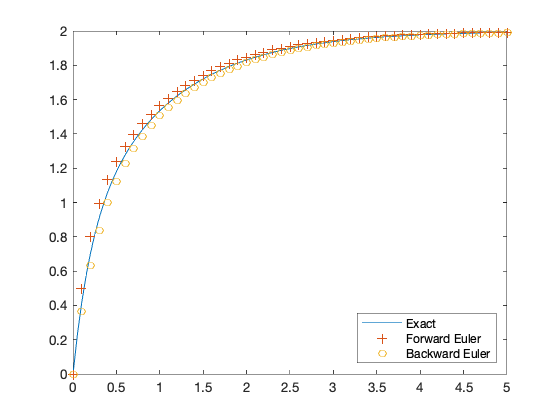

In [32]:
clear

% Exact solution
t = linspace(0, 5);
y_exact = @(t) -(3/4)*exp(-5*t) - (5/4)*exp(-t) + 2;
plot(t, y_exact(t)); hold on

dt = 0.1;
t = 0 : dt : 5;

% Forward Euler
f = @(t, y1, y2) 10 - 6*y2 - 5*y1;
y1 = zeros(length(t), 1); y2 = zeros(length(t), 1);
y1(1) = 0; y2(1) = 5;
for i = 1 : length(t) - 1
    y1(i+1) = y1(i) + dt*y2(i);
    y2(i+1) = y2(i) + dt*f(t(i), y1(i), y2(i));
end
plot(t, y1, '+')

Y = zeros(length(t), 2);
Y(1,1) = 0;
Y(1,2) = 5;
for i = 1 : length(t) - 1
    D = 1 + 6*dt + 5*dt^2;
    Y(i+1, 1) = (Y(i,1)*(1 + 6*dt) + dt*(Y(i,2) + 10*dt)) / D;
    Y(i+1, 2) = (Y(i,2) + 10*dt - Y(i,1)*5*dt) / D;
end
plot(t, Y(:,1), 'o')
legend('Exact', 'Forward Euler', 'Backward Euler', 'location', 'southeast')

fprintf('Maximum error of Forward Euler: %5.3f\n', max(abs(y1(:) - y_exact(t)')));
fprintf('Maximum error of Backward Euler: %5.3f', max(abs(Y(:,1) - y_exact(t)')));

So, for $\Delta t = 0.1$, we see that the Forward and Backward Euler methods give an error $\mathcal{O}(\Delta t)$, as expected since both methods are *first-order* accurate.

Let's see how they compare for a larger step size:

Maximum error of Forward Euler: 43.242
Maximum error of Backward Euler: 0.228

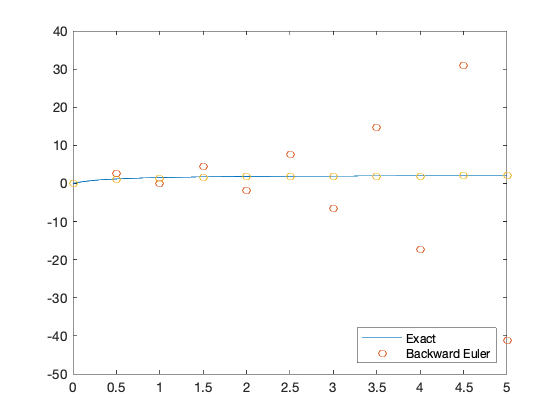

In [31]:
clear

% Exact solution
t = linspace(0, 5);
y_exact = @(t) -(3/4)*exp(-5*t) - (5/4)*exp(-t) + 2;
plot(t, y_exact(t)); hold on

dt = 0.5;
t = 0 : dt : 5;

% Forward Euler
f = @(t, y1, y2) 10 - 6*y2 - 5*y1;
y1 = zeros(length(t), 1); y2 = zeros(length(t), 1);
y1(1) = 0; y2(1) = 5;
for i = 1 : length(t) - 1
    y1(i+1) = y1(i) + dt*y2(i);
    y2(i+1) = y2(i) + dt*f(t(i), y1(i), y2(i));
end
plot(t, y1, 'o')

% Backward Euler

Y = zeros(length(t), 2);
Y(1,1) = 0;
Y(1,2) = 5;
for i = 1 : length(t) - 1
    D = 1 + 6*dt + 5*dt^2;
    Y(i+1, 1) = (Y(i,1)*(1 + 6*dt) + dt*(Y(i,2) + 10*dt)) / D;
    Y(i+1, 2) = (Y(i,2) + 10*dt - Y(i,1)*5*dt) / D;
end
plot(t, Y(:,1), 'o')
legend('Exact', 'Backward Euler', 'location', 'southeast')

%fprintf('Maximum error of Forward Euler: %5.3f\n', max(abs(y1(:) - y_exact(t)')));
%fprintf('Maximum error of Backward Euler: %5.3f', max(abs(Y(:,1) - y_exact(t)')));

fprintf('Maximum error of Forward Euler: %5.3f\n', max(abs(y1(:) - y_exact(t)')));
fprintf('Maximum error of Backward Euler: %5.3f', max(abs(Y(:,1) - y_exact(t)')));

Backward Euler, since it is unconditionally stable, remains well-behaved at this larger step size, while the Forward Euler method blows up.

## Cramer's Rule

Cramer's Rule provides a solution method for a system of linear equations, where the number of equations equals the number of unknowns. It works for any number of equations/unknowns, but isn't really practical for more than two or three. We'll focus on using it for a system of two equations, with two unknowns $x_1$ and $x_2$:
\begin{gather}
a_{11} + x_1 + a_{12} x_2 = b_1 \\
a_{21} + x_1 + a_{22} x_2 = b_2 \\
\text{or } \mathbf{A} \mathbf{x} = \mathbf{b}
\end{gather}
where
\begin{gather}
\mathbf{A} = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} \\
\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \\
\mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}
\end{gather}

The solutions for the unknowns are then
\begin{align}
x_1 &= \frac{ \begin{vmatrix} b_1 & a_{12} \\ b_2 & a_{22} \end{vmatrix} }{D} = \frac{b_1 a_{22} - a_{12} b_2}{D} \\
x_2 &= \frac{ \begin{vmatrix} a_{11} & b_1 \\ a_{21} & b_2 \end{vmatrix} }{D} = \frac{a_{11} b_2 - b_1 a_{21}}{D}
\end{align}
where $D$ is the determinant of $\mathbf{A}$:
\begin{equation}
D = \det(\mathbf{A}) = \begin{vmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{vmatrix} = a_{11} a_{22} - a_{12} a_{21}
\end{equation}
This works as long as the determinant does not equal zero.